In [1]:
!nvidia-smi

Tue May 28 12:00:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [3]:
!pip install torch==2.1.1
!pip install torch==2.1.1 torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 2.8 MB/s eta 0:00:00
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
!rm -r /content/GaussianSplatting_3DR_SLAM

In [4]:
#!git clone https://github.com/graphdeco-inria/gaussian-splatting --recursive
!git clone https://github.com/Hedy-dev/GaussianSplatting_3DR_SLAM --recursive

Cloning into 'GaussianSplatting_3DR_SLAM'...
remote: Enumerating objects: 2131, done.
remote: Counting objects: 100% (479/479), done.
remote: Compressing objects: 100% (396/396), done.
remote: Total 2131 (delta 79), reused 460 (delta 69), pack-reused 1652
Receiving objects: 100% (2131/2131), 557.66 MiB | 35.70 MiB/s, done.
Resolving deltas: 100% (982/982), done.
Updating files: 100% (3447/3447), done.


In [5]:
import torch
torch.__version__

'2.1.1+cu121'

In [6]:
!pip install plyfile tqdm

In [7]:
!ls

GaussianSplatting_3DR_SLAM  sample_data


In [8]:
#/content/gaussian-splatting/submodules/diff-gaussian-rasterization
!pip install GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/submodules/diff-gaussian-rasterization
!pip install GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/submodules/simple-knn
!cd GaussianSplatting_3DR_SLAM/SLAM && pip install -r requirements.txt

Processing ./GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/submodules/diff-gaussian-rasterization
  Preparing metadata (setup.py) ... done
  Created wheel for diff-gaussian-rasterization: filename=diff_gaussian_rasterization-0.0.0-cp310-cp310-linux_x86_64.whl size=3149484 sha256=c8e87e042b97c1147f355604339e11e59003c67c91bd637b5c8fca70770eab2e
  Stored in directory: /root/.cache/pip/wheels/a8/fd/49/dc60e61edcbe762d8d5b53a99f2629a3de0df0560ee52fc8e8
Successfully built diff-gaussian-rasterization
Processing ./GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/submodules/simple-knn
  Preparing metadata (setup.py) ... done
  Created wheel for simple-knn: filename=simple_knn-0.0.0-cp310-cp310-linux_x86_64.whl size=2930296 sha256=b161f9c0341366831d516b1518342a0caec6b2d8605898b6302c5b76935b54bd
  Stored in directory: /root/.cache/pip/wheels/81/1c/1a/db6bb8a2de1127bde30951b91e87cf99a001bcfcffebc79f13
Successfully built simple-knn
Processing ./submodules/icomma-diff-gaussian-rasterization
  Preparing m

In [ ]:
#!pip install gaussian-splatting/submodules/simple-knn

Processing ./gaussian-splatting/submodules/simple-knn
  Preparing metadata (setup.py) ... done
  Created wheel for simple-knn: filename=simple_knn-0.0.0-cp310-cp310-linux_x86_64.whl size=2930223 sha256=e252d1e5ca32342ad5433e01617942e60da83aaf4b9dcbb503bece802b6b7e56
  Stored in directory: /root/.cache/pip/wheels/81/d6/08/724a60e90d22d28442460572b541e07593de0440482e43701c
Successfully built simple-knn


Установка COLMAP

In [9]:
!sudo apt-get install \
    git \
    cmake \
    build-essential \
    libboost-program-options-dev \
    libboost-filesystem-dev \
    libboost-graph-dev \
    libboost-regex-dev \
    libboost-system-dev \
    libboost-test-dev \
    libeigen3-dev \
    libsuitesparse-dev \
    libfreeimage-dev \
    libgoogle-glog-dev \
    libgflags-dev \
    libglew-dev \
    qtbase5-dev \
    libqt5opengl5-dev \
    libcgal-dev \
    libcgal-qt5-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libboost-filesystem-dev is already the newest version (1.74.0.3ubuntu7).
libboost-filesystem-dev set to manually installed.
libboost-program-options-dev is already the newest version (1.74.0.3ubuntu7).
libboost-program-options-dev set to manually installed.
libboost-regex-dev is already the newest version (1.74.0.3ubuntu7).
libboost-regex-dev set to manually installed.
libboost-system-dev is already the newest version (1.74.0.3ubuntu7).
libboost-system-dev set to manually installed.
libboost-graph-dev is already the newest version (1.74.0.3ubuntu7).
libboost-graph-dev set to manually installed.
libboost-test-dev is already the newest version (1.74.0.3ubuntu7).
libboost-test-dev set to manually installed.
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.10).
The fol

In [10]:
!sudo apt-get install libatlas-base-dev libsuitesparse-dev
!git clone https://ceres-solver.googlesource.com/ceres-solver
%cd ceres-solver
!git checkout $(git describe --tags) # Checkout the latest release
%mkdir build
%cd build
!cmake .. -DBUILD_TESTING=OFF -DBUILD_EXAMPLES=OFF
!make
!sudo make install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libatlas-base-dev is already the newest version (3.10.3-12ubuntu1).
libsuitesparse-dev is already the newest version (1:5.10.1+dfsg-4build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'ceres-solver'...
remote: Total 21923 (delta 13815), reused 21923 (delta 13815)
Receiving objects: 100% (21923/21923), 20.85 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (13815/13815), done.
/content/ceres-solver
Note: switching to '2.2.0-27-gf8c2994d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  gi

In [11]:
%cd /content

/content


In [ ]:
!rm -rf /content/colmap

In [12]:
!sudo apt-get install\
git\
cmake\
ninja-build\
build-essential\
libboost-program-options-dev\
libboost-filesystem-dev\
libboost-graph-dev\
libboost-system-dev\
libeigen3-dev\
libflann-dev\
libfreeimage-dev\
libmetis-dev\
libgoogle-glog-dev\
libgtest-dev\
libsqlite3-dev\
libglew-dev\
qtbase5-dev\
libqt5opengl5-dev\
libcgal-dev\
libceres-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libboost-filesystem-dev is already the newest version (1.74.0.3ubuntu7).
libboost-program-options-dev is already the newest version (1.74.0.3ubuntu7).
libboost-system-dev is already the newest version (1.74.0.3ubuntu7).
libboost-graph-dev is already the newest version (1.74.0.3ubuntu7).
libcgal-dev is already the newest version (5.4-1).
libeigen3-dev is already the newest version (3.4.0-2ubuntu2).
libglew-dev is already the newest version (2.2.0-4).
libgoogle-glog-dev is already the newest version (0.5.0+really0.4.0-2).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.10).
libsqlite3-dev is already the newest version (3.37.2-2ubuntu0.3).
libsqlite3-dev set to manually installed.
libfreeimage-dev is already the newest version (3.18.0+ds2-6ubuntu5.1).
libqt5opengl5-d

In [13]:
!git clone https://github.com/colmap/colmap
%cd colmap
!git checkout dev
%mkdir build
%cd build
!cmake ..
!make
!sudo make install
!CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 cmake ..

Cloning into 'colmap'...
remote: Enumerating objects: 20531, done.
remote: Counting objects: 100% (938/938), done.
remote: Compressing objects: 100% (754/754), done.
remote: Total 20531 (delta 508), reused 423 (delta 177), pack-reused 19593
Receiving objects: 100% (20531/20531), 14.87 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (16248/16248), done.
/content/colmap
error: pathspec 'dev' did not match any file(s) known to git
/content/colmap/build
-- Enabling LSD support
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Boost: /

In [20]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev
  inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The f

In [25]:
!convert logo: logo.gif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Скачивание датасетов

In [ ]:
# Replica dataset
!mkdir -p ./data && cd ./data && wget https://cvg-data.inf.ethz.ch/nice-slam/data/Replica.zip && unzip Replica.zip

In [ ]:
# TUM dataset
!mkdir -p ./data/TUM_RGBD
!cd data/TUM_RGBD && wget https://vision.in.tum.de/rgbd/dataset/freiburg1/rgbd_dataset_freiburg1_desk.tgz && tar -xvzf rgbd_dataset_freiburg1_desk.tgz
!cd data/TUM_RGBD && wget https://cvg.cit.tum.de/rgbd/dataset/freiburg1/rgbd_dataset_freiburg1_desk2.tgz && tar -xvzf rgbd_dataset_freiburg1_desk2.tgz
!cd data/TUM_RGBD && wget https://cvg.cit.tum.de/rgbd/dataset/freiburg1/rgbd_dataset_freiburg1_room.tgz && tar -xvzf rgbd_dataset_freiburg1_room.tgz
!cd data/TUM_RGBD && wget https://vision.in.tum.de/rgbd/dataset/freiburg2/rgbd_dataset_freiburg2_xyz.tgz && tar -xvzf rgbd_dataset_freiburg2_xyz.tgz
!cd data/TUM_RGBD && wget https://vision.in.tum.de/rgbd/dataset/freiburg3/rgbd_dataset_freiburg3_long_office_household.tgz && tar -xvzf rgbd_dataset_freiburg3_long_office_household.tgz

In [ ]:
!cd /content/data/TUM_RGBD/rgbd_dataset_freiburg1_room && rm -r depth && rm accelerometer.txt && rm depth.txt && rm groundtruth.txt && rm rgb.txt

!mv /content/data/TUM_RGBD/rgbd_dataset_freiburg1_room/rgb /content/data/TUM_RGBD/rgbd_dataset_freiburg1_room/input

In [ ]:
# !cp -r /content/drive/MyDrive/Diploma2/playground /playground

cp: cannot stat '/content/drive/MyDrive/Diploma2/playground': No such file or directory


In [ ]:
!gdown https://drive.google.com/uc?id=1Dk9B-oOU0iuqmQmmeT8Y1RRJ1UDQtAIg

Downloading...
From (original): https://drive.google.com/uc?id=1Dk9B-oOU0iuqmQmmeT8Y1RRJ1UDQtAIg
From (redirected): https://drive.google.com/uc?id=1Dk9B-oOU0iuqmQmmeT8Y1RRJ1UDQtAIg&confirm=t&uuid=37c5f960-e2fb-4957-9ae3-b2300e33df75
To: /content/playground.zip
100% 1.39G/1.39G [00:17<00:00, 78.2MB/s]


In [ ]:
!unzip playground.zip

Archive:  playground.zip
   creating: playground/
   creating: playground/distorted/
  inflating: playground/distorted/database.db  
   creating: playground/distorted/sparse/
   creating: playground/distorted/sparse/0/
  inflating: playground/distorted/sparse/0/cameras.bin  
  inflating: playground/distorted/sparse/0/images.bin  
  inflating: playground/distorted/sparse/0/points3D.bin  
  inflating: playground/distorted/sparse/0/project.ini  
   creating: playground/images/
  inflating: playground/images/frame0.png  
  inflating: playground/images/frame1.png  
  inflating: playground/images/frame10.png  
  inflating: playground/images/frame100.png  
  inflating: playground/images/frame101.png  
  inflating: playground/images/frame102.png  
  inflating: playground/images/frame103.png  
  inflating: playground/images/frame104.png  
  inflating: playground/images/frame105.png  
  inflating: playground/images/frame106.png  
  inflating: playground/images/frame107.png  
  inflating: playgro

In [ ]:
!mv /content/playground/images /content/playground/images_large
!mv /content/playground/images_2 /content/playground/images

In [ ]:
!python /content/gaussian-splatting/train.py -s /content/playground --model_path /content/saving --save_iterations 7000


2024-05-27 13:52:40.324401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 13:52:40.324457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 13:52:40.328239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-27 13:52:40.339081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 13:52:42.534604: W tensorflow/comp

In [ ]:
#!zip -r /content/saving.zip /content/saving

  adding: saving/ (stored 0%)
  adding: saving/cfg_args (deflated 24%)
  adding: saving/events.out.tfevents.1716755589.aae4375fe9a4.2396.0 (deflated 9%)


In [ ]:
#!cp /saving.zip /content/drive/MyDrive/Diploma2/playground

### Загрузка видео

При построении модели основываясь на видеоролике

In [ ]:
%cd /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/input_data
from google.colab import files
files.upload()
%cd /content

In [15]:
!rm -r /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/data/input

### Обработка видео

In [16]:
%cd /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION
!python cut_video.py
%cd /content

/content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION
The value of 'video_name' is: playground.mp4, 'frames' is 200
/content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION
Сохранено 200 кадров.
/content


### Построение COLMAP

In [17]:
%cd /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION
!python convert.py -s data --resize
%cd /content

/content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION
I0528 13:12:09.934924 23821 misc.cc:198] 
Feature extraction
I0528 13:12:09.935657 23824 sift.cc:716] Creating SIFT GPU feature extractor
I0528 13:12:10.361725 23825 feature_extraction.cc:255] Processed file [1/200]
I0528 13:12:10.361786 23825 feature_extraction.cc:258]   Name:            frame0.png
I0528 13:12:10.361801 23825 feature_extraction.cc:284]   Dimensions:      1920 x 1080
I0528 13:12:10.361832 23825 feature_extraction.cc:287]   Camera:          #1 - OPENCV
I0528 13:12:10.361847 23825 feature_extraction.cc:290]   Focal Length:    2304.00px
I0528 13:12:10.361876 23825 feature_extraction.cc:303]   Features:        10173
I0528 13:12:10.436492 23825 feature_extraction.cc:255] Processed file [2/200]
I0528 13:12:10.436533 23825 feature_extraction.cc:258]   Name:            frame1.png
I0528 13:12:10.436542 23825 feature_extraction.cc:284]   Dimensions:      1920 x 1080
I0528 13:12:10.436548 23825 feature_extraction.cc:287]   Cam

Если возникла ошибка при изменении размера изображений:

In [26]:
# !mkdir public_html/images/new-thumbs
%cd /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/data/images
!mogrify -resize 50% -quality 100 -path ../images_2 *.png
%cd /content

/content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/data/images
/content


In [27]:
!mv /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/data/images /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/data/images_large
!mv /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/data/images_2 /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/data/images

### Обучение модели

In [28]:
%cd /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION
!python train.py -s data --model_path model --save_iterations 7000
%cd /content

/content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION
2024-05-28 14:24:38.606119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 14:24:38.606170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 14:24:38.700999: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-28 14:24:38.895675: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

### Визуализация модели

установка библиотек для визуализации

In [30]:
!pip install ipywidgets ipyevents ipycanvas jupyter matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.8 MB/s eta 0:00:00


In [31]:
!pip install kaolin==0.15.0 -f https://nvidia-kaolin.s3.us-east-2.amazonaws.com/torch-2.1.1_cu121.html


Looking in links: https://nvidia-kaolin.s3.us-east-2.amazonaws.com/torch-2.1.1_cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.2 MB/s eta 0:00:00
  Created wheel for pygltflib: filename=pygltflib-1.16.2-py3-none-any.whl size=27300 sha256=056d5b54c4278f2e68887ba5f8ac1fa04abc16b7a151f384ba498cdb4c667a70
  Stored in directory: /root/.cache/pip/wheels/4a/95/a2/2ee16c602170b0601ebeddbf06597868f09b7dbb0495ae99c4
Successfully built pygltflib


In [32]:
!python -c "import kaolin; print(kaolin.__version__)"

0.15.0


In [29]:
%cd /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION

/content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION


In [34]:
import os
print(os.getcwd())

/content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION


In [35]:
import copy
import ipywidgets
import json
import kaolin
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torchvision
torch.__version__

'2.1.1+cu121'

In [36]:
# Gaussian splatting dependencies
from utils.graphics_utils import focal2fov
from utils.system_utils import searchForMaxIteration
from gaussian_renderer import render, GaussianModel
from scene.cameras import Camera as GSCamera



%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# !python -m pip install kaolin==0.14.0 -f https://nvidia-kaolin.s3.us-east-2.amazonaws.com/torch-1.12.1_cu113.html

In [ ]:
#!pip uninstall kaolin

Found existing installation: kaolin 0.15.0
Uninstalling kaolin-0.15.0:
  Would remove:
    /usr/local/bin/kaolin-dash3d
    /usr/local/lib/python3.10/dist-packages/kaolin-0.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/kaolin/*
Proceed (Y/n)? Y
  Successfully uninstalled kaolin-0.15.0


In [ ]:
#!pip install kaolin==0.15.0 -f https://nvidia-kaolin.s3.us-east-2.amazonaws.com/torch-2.1.1_cu121.html
#!ls
#%cd /content
#%cd kaolin
#!python setup.py develop
#!python -c "import kaolin; print(kaolin.version)"
#!git clone --recursive https://github.com/NVIDIAGameWorks/kaolin
#% cd ..

Looking in links: https://nvidia-kaolin.s3.us-east-2.amazonaws.com/torch-2.1.1_cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 806.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00
  Created wheel for pygltflib: filename=pygltflib-1.16.2-py3-none-any.whl size=27300 sha256=ecac0c78c12cd31233f6a31b6af9081086f506d776b9520cc9d5a08360b13634
  Stored in directory: /root/.cache/pip/wheels/4a/95/a2/2ee16c602170b0601ebeddbf06597868f09b7dbb0495ae99c4
Successfully built pygltflib


In [ ]:
#!pip freeze | grep kaolin
#!zip -r gaussianSplatting.zip gaussianSplatting

-e git+https://github.com/NVIDIAGameWorks/kaolin@eed958fdb90880e4923abc9b04f60216f24b483f#egg=kaolin


In [ ]:
#!mv /content/kaolin /content/kaolin_src
#!cp -r /content/kaolin_src/kaolin /content/kaolin
#!export PYTHONPATH=/kaolin root dir:$PYTHONPATH

In [37]:
# import kaolin
def log_tensor(t, name, **kwargs):
    print(kaolin.utils.testing.tensor_info(t, name=name, **kwargs))

In [38]:
print(kaolin)

<module 'kaolin' from '/usr/local/lib/python3.10/dist-packages/kaolin/__init__.py'>


In [40]:
model_path = 'model'

In [41]:
class PipelineParamsNoparse:
    """ Same as PipelineParams but without argument parser. """
    def __init__(self):
        self.convert_SHs_python = False
        self.compute_cov3D_python = False
        self.debug = False


def load_checkpoint(model_path, sh_degree=3, iteration=-1):
    # Find checkpoint
    checkpt_dir = os.path.join(model_path, "point_cloud")
    if iteration == -1:
        iteration = searchForMaxIteration(checkpt_dir)
    checkpt_path = os.path.join(checkpt_dir, f"iteration_{iteration}", "point_cloud.ply")

    # Load guassians
    gaussians = GaussianModel(sh_degree)
    gaussians.load_ply(checkpt_path)
    return gaussians


def try_load_camera(model_path):
    """ Load one of the default cameras for the scene. """
    cam_path = os.path.join(model_path, 'cameras.json')
    if not os.path.exists(cam_path):
        print(f'Could not find saved cameras for the scene at {camp_path}; using default for ficus.')
        return GSCamera(colmap_id=0,
                        R=np.array([[-9.9037e-01,  2.3305e-02, -1.3640e-01], [ 1.3838e-01,  1.6679e-01, -9.7623e-01], [-1.6444e-09, -9.8571e-01, -1.6841e-01]]),
                        T=np.array([6.8159e-09, 2.0721e-10, 4.03112e+00]),
                        FoVx=0.69111120, FoVy=0.69111120,
                        image=torch.zeros((3, 800, 800)),  # fake
                        gt_alpha_mask=None, image_name='fake', uid=0)

    with open(cam_path) as f:
        data = json.load(f)
        raw_camera = data[0]

    tmp = np.zeros((4, 4))
    tmp[:3, :3] = raw_camera['rotation']
    tmp[:3, 3] = raw_camera['position']
    tmp[3, 3] = 1
    C2W = np.linalg.inv(tmp)
    R = C2W[:3, :3].transpose()
    T = C2W[:3, 3]
    width = raw_camera['width']
    height = raw_camera['height']
    fovx = focal2fov(raw_camera['fx'], width)
    fovy = focal2fov(raw_camera['fy'], height)
    return GSCamera(colmap_id=0,
                    R=R, T=T, FoVx=fovx, FoVy=fovy,
                    image=torch.zeros((3, height, width)),  # fake
                    gt_alpha_mask=None, image_name='fake', uid=0)



gaussians = load_checkpoint(model_path)
pipeline = PipelineParamsNoparse()
background = torch.tensor([0, 0, 0], dtype=torch.float32, device="cuda")
test_camera = try_load_camera(model_path)

render: [3, 1055, 1874] (torch.float32)[cuda:0]  - [min 0.0000, max 1.2181, mean 0.3589] 
viewspace_points: [1525256, 3] (torch.float32)[cuda:0]  - [min 0.0000, max 0.0000, mean 0.0000] 
visibility_filter: [1525256] (torch.bool)[cuda:0]  - [min 0.0000, max 1.0000, mean 0.4433] 
radii: [1525256] (torch.int32)[cuda:0]  - [min 0.0000, max 7916.0000, mean 6.9316] 


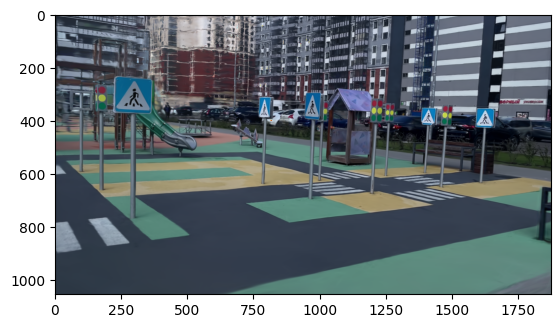

In [42]:
render_res = render(test_camera, gaussians, pipeline, background)
rendering = render_res["render"]
for k in render_res.keys():
    log_tensor(render_res[k], k, print_stats=True)
plt.imshow((rendering.permute(1, 2, 0) * 255).to(torch.uint8).detach().cpu().numpy())

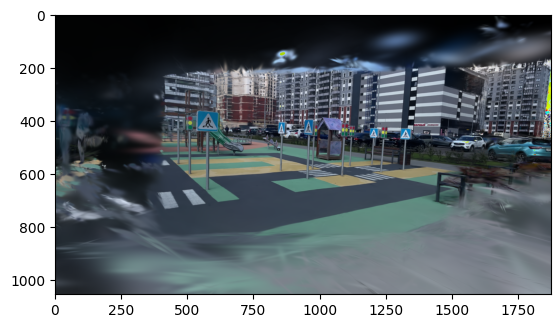

In [43]:
def compute_cam_fov(intrinsics, axis='x'):
    # Compute FOV from focal length
    aspectScale = intrinsics.width / 2.0 if axis == 'x' else intrinsics.height / 2.0
    focal = (intrinsics.focal_x if axis == 'x' else intrinsics.focal_y).item()
    tanHalfAngle = aspectScale / focal
    fov = np.arctan(tanHalfAngle) * 2
    return fov

def convert_kaolin_camera(kal_camera):
    """ Convert kaolin camera to GS camera. """
    R = kal_camera.extrinsics.R[0]
    R[1:3] = -R[1:3]
    T = kal_camera.extrinsics.t.squeeze()
    T[1:3] = -T[1:3]
    return GSCamera(colmap_id=0,
                    R=R.transpose(1, 0).cpu().numpy(),
                    T=T.cpu().numpy(),
                    FoVx=compute_cam_fov(kal_camera.intrinsics, 'x'),
                    FoVy=compute_cam_fov(kal_camera.intrinsics, 'y'),
                    image=torch.zeros((3, kal_camera.height, kal_camera.width)),  # fake
                    gt_alpha_mask=None,
                    image_name='fake',
                    uid=0)

def convert_gs_camera(gs_camera):
    """ Convert GS camera to Kaolin camera. """
    view_mat = gs_camera.world_view_transform.transpose(1, 0)
    view_mat[1:3] = -view_mat[1:3]
    #
    aspect_ratio = gs_camera.image_width / gs_camera.image_height
    fov_y = gs_camera.FoVy
    #fov_x = 2 * np.arctan(np.tan(np.radians(fov_y) / 2) * aspect_ratio)
    #
    res = kaolin.render.camera.Camera.from_args(
        view_matrix=view_mat,
        width=gs_camera.image_width, height=gs_camera.image_height,
        fov=gs_camera.FoVx, device='cpu')
    return res

#
def adjust_camera_position(gs_camera, shift):
    """Adjust the camera position by a given shift along the X axis."""
    gs_camera.T[0] += shift  # Shift camera position along the X axis
    return gs_camera
shift = 0.1  # Adjust this value to shift the camera
test_camera = adjust_camera_position(test_camera, shift)
#

# Test that we can render the same thing
kal_cam = convert_gs_camera(test_camera)
test_cam_back = convert_kaolin_camera(kal_cam)
rendering = render(test_cam_back, gaussians, pipeline, background)["render"]
plt.imshow((rendering.permute(1, 2, 0) * 255).to(torch.uint8).detach().cpu().numpy())

# DEBUG
# print(f'orig view matrix: {test_camera.world_view_transform}')
# print(f'new view_matrix: {test_cam_back.world_view_transform}')
# print(f'orig camera center: {test_camera.camera_center}')
# print(f'new camera center: {test_cam_back.camera_center}')

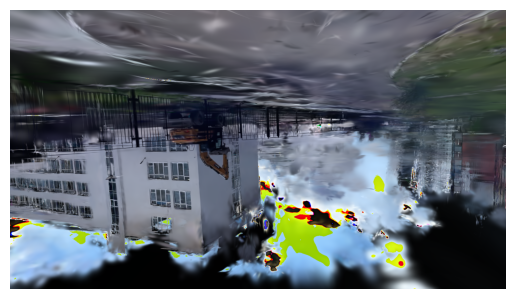

orig view matrix: tensor([[ 0.8462,  0.0215, -0.5325,  0.0000],
        [-0.0357,  0.9992, -0.0164,  0.0000],
        [ 0.5317,  0.0329,  0.8463,  0.0000],
        [-1.4065, -0.5950,  5.5475,  1.0000]], device='cuda:0')
new view_matrix: tensor([[ 0.8462, -0.0215,  0.5325,  0.0000],
        [-0.0357, -0.9992,  0.0164,  0.0000],
        [ 0.5317, -0.0329, -0.8463,  0.0000],
        [-1.4065,  0.5950, -5.5475,  1.0000]], device='cuda:0')
orig camera center: tensor([ 4.1570,  0.6354, -3.9271], device='cuda:0')
new camera center: tensor([ 4.1570,  0.6354, -3.9271], device='cuda:0')


In [ ]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# def compute_cam_fov(intrinsics, axis='x'):
#     # Compute FOV from focal length
#     aspectScale = intrinsics.width / 2.0 if axis == 'x' else intrinsics.height / 2.0
#     focal = (intrinsics.focal_x if axis == 'x' else intrinsics.focal_y).item()
#     tanHalfAngle = aspectScale / focal
#     fov = np.arctan(tanHalfAngle) * 2
#     return fov

# def convert_kaolin_camera(kal_camera):
#     """Convert kaolin camera to GS camera."""
#     R = kal_camera.extrinsics.R[0]
#     R[1:3] = -R[1:3]
#     T = kal_camera.extrinsics.t.squeeze()
#     T[1:3] = -T[1:3]
#     return GSCamera(colmap_id=0,
#                     R=R.transpose(1, 0).cpu().numpy(),
#                     T=T.cpu().numpy(),
#                     FoVx=compute_cam_fov(kal_camera.intrinsics, 'x'),
#                     FoVy=compute_cam_fov(kal_camera.intrinsics, 'y'),
#                     image=torch.zeros((3, kal_camera.height, kal_camera.width)),  # fake
#                     gt_alpha_mask=None,
#                     image_name='fake',
#                     uid=0)

# def convert_gs_camera(gs_camera):
#     """Convert GS camera to Kaolin camera."""
#     view_mat = gs_camera.world_view_transform.transpose(1, 0)
#     view_mat[1:3] = -view_mat[1:3]
#     aspect_ratio = gs_camera.image_width / gs_camera.image_height
#     fov_y = gs_camera.FoVy
#     fov_x = 2 * np.arctan(np.tan(np.radians(fov_y) / 2) * aspect_ratio)
#     res = kaolin.render.camera.Camera.from_args(
#         view_matrix=view_mat,
#         width=gs_camera.image_width, height=gs_camera.image_height,
#         fov=np.degrees(fov_x), device='cpu')
#     return res

# def adjust_camera_position(gs_camera, shift):
#     """Adjust the camera position by a given shift along the X axis."""
#     gs_camera.T[0] += shift  # Shift camera position along the X axis
#     return gs_camera

# # Тестирование рендеринга с корректировкой положения камеры
# shift = 0.1  # Adjust this value to shift the camera
# test_camera = adjust_camera_position(test_camera, shift)

# kal_cam = convert_gs_camera(test_camera)
# test_cam_back = convert_kaolin_camera(kal_cam)
# render_res = render(test_cam_back, gaussians, pipeline, background)
# rendering = render_res["render"]

# plt.imshow((rendering.permute(1, 2, 0) * 255).to(torch.uint8).detach().cpu().numpy())
# plt.axis('off')
# plt.show()

# # DEBUG
# print(f'orig view matrix: {test_camera.world_view_transform}')
# print(f'new view_matrix: {test_cam_back.world_view_transform}')
# print(f'orig camera center: {test_camera.camera_center}')
# print(f'new camera center: {test_cam_back.camera_center}')


In [44]:
# !pip install "ipywidgets>=7,<8"

In [45]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# %tensorflow_version 2.x
# !pip install -q -U matplotlib-gpu

In [ ]:
# plt.show()

In [48]:
import ipywidgets as widgets
widgets.HTML('TEST')

HTML(value='TEST')

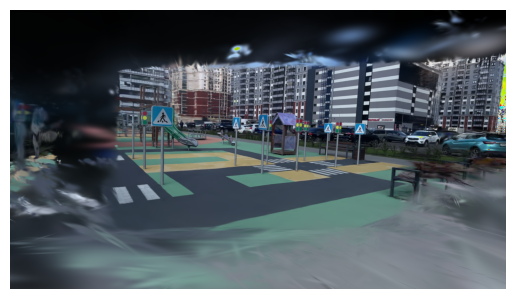

In [49]:
import time
%matplotlib inline
def render_kaolin(kaolin_cam):
    cam = convert_kaolin_camera(kaolin_cam)
    render_res = render(cam, gaussians, pipeline, background)
    rendering = render_res["render"]
    return (rendering.permute(1, 2, 0) * 255).to(torch.uint8).detach().cpu()

focus_at = (kal_cam.cam_pos() - 4. * kal_cam.extrinsics.cam_forward()).squeeze()
visualizer = kaolin.visualize.IpyTurntableVisualizer(
    512, 512, copy.deepcopy(kal_cam), render_kaolin,
    focus_at=focus_at, world_up_axis=2, max_fps=2)
# display(
#pn.panel(visualizer.show())#)
#visualizer.show()
rendering = render_kaolin(kal_cam)

# Отображаем результат с помощью matplotlib
plt.imshow(rendering.numpy())
plt.axis('off')
plt.show()

#display(visualizer2)

#plt.show()

#print(visualizer)

In [50]:
import torch
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Объявляем вашу функцию визуализации
def render_kaolin(kaolin_cam, gaussians):
    cam = convert_kaolin_camera(kaolin_cam)
    render_res = render(cam, gaussians, pipeline, background)
    rendering = render_res["render"]
    return (rendering.permute(1, 2, 0) * 255).to(torch.uint8).detach().cpu()

def selective_render_kaolin(kaolin_cam, slider_value):
    """Render with subsampled gaussians based on their scale."""
    scaling = gaussians._scaling.max(dim=1)[0]
    mask = scaling < slider_value
    tmp_gaussians = GaussianModel(gaussians.max_sh_degree)
    tmp_gaussians._xyz = gaussians._xyz[mask, :]
    tmp_gaussians._features_dc = gaussians._features_dc[mask, ...]
    tmp_gaussians._features_rest = gaussians._features_rest[mask, ...]
    tmp_gaussians._opacity = gaussians._opacity[mask, ...]
    tmp_gaussians._scaling = gaussians._scaling[mask, ...]
    tmp_gaussians._rotation = gaussians._rotation[mask, ...]
    tmp_gaussians.active_sh_degree = gaussians.max_sh_degree

    return render_kaolin(kaolin_cam, tmp_gaussians)

# Функция обработки изменения значения слайдера
def handle_slider(change):
    with output:
        clear_output(wait=True)
        rendering = selective_render_kaolin(kal_cam, slider.value)
        plt.imshow(rendering.numpy())
        plt.axis('off')
        plt.show()

# Инициализация слайдера
scaling = gaussians._scaling.max(dim=1)[0]
slider = widgets.FloatSlider(value=scaling.max().item(),
    min=scaling.min().item(), max=scaling.max().item(),
    step=0.1,
    description='Max scale:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
slider.observe(handle_slider, names='value')

# Создание области вывода
output = widgets.Output()

# Отображение начального рендера
with output:
    rendering = selective_render_kaolin(kal_cam, slider.value)
    plt.imshow(rendering.numpy())
    plt.axis('off')
    plt.show()

# Отображение слайдера и области вывода
display(slider, output)


FloatSlider(value=-0.017445554956793785, description='Max scale:', max=-0.017445554956793785, min=-8.938443183…

Output()

In [51]:
import imageio

In [52]:
def create_gif(kal_cam, gaussians, file_name='animation.gif', num_frames=20):
    # Диапазон значений слайдера
    scaling = gaussians._scaling.max(dim=1)[0]
    min_scale = scaling.min().item()
    max_scale = scaling.max().item()
    values = np.linspace(min_scale, max_scale, num_frames)

    # Создание кадров
    frames = []
    for value in values:
        rendering = selective_render_kaolin(kal_cam, value)
        frames.append(rendering.numpy())

    # Сохранение GIF
    imageio.mimsave(file_name, frames, fps=2)

    # Отображение GIF в ноутбуке
    #with open(file_name, 'rb') as file:
        #display(Image(data=file.read(), format='png'))

# Вызов функции для создания GIF
create_gif(kal_cam, gaussians)

### Работа SLAM

In [54]:
!pip install gdown

In [55]:
!cd /content/GaussianSplatting_3DR_SLAM/SLAM/LoFTR && gdown --folder https://drive.google.com/drive/folders/1xu2Pq6mZT5hmFgiYMBT9Zt8h1yO-3SIp

Retrieving folder contents
Processing file 19s3QvcCWQ6g-N1PrYlDCg-2mOJZ3kkgS indoor_ds_new.ckpt
Processing file 1kW2bQejjMlmE7FGberHrubXpE_ttX2LB indoor_ot.ckpt
Processing file 1M-VD35-qdB5Iw-AtbDBCKC7hPolFW9UY outdoor_ds.ckpt
Processing file 1p2lxEyQm4ykJXsSKgiJ6pGf9WxyqWOnC outdoor_ot.ckpt
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=19s3QvcCWQ6g-N1PrYlDCg-2mOJZ3kkgS
From (redirected): https://drive.google.com/uc?id=19s3QvcCWQ6g-N1PrYlDCg-2mOJZ3kkgS&confirm=t&uuid=b6b014f6-e00c-46df-8501-857755038311
To: /content/GaussianSplatting_3DR_SLAM/SLAM/LoFTR/weights/indoor_ds_new.ckpt
100% 46.4M/46.4M [00:01<00:00, 33.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1kW2bQejjMlmE7FGberHrubXpE_ttX2LB
From (redirected): https://drive.google.com/uc?id=1kW2bQejjMlmE7FGberHrubXpE_ttX2LB&confirm=t&uuid=2e8c9e8b-eeb7-42e8-b611-8b5cd2f26646
To: /content/Gaus

In [56]:
!mv /content/GaussianSplatting_3DR_SLAM/SLAM/LoFTR/weights /content/GaussianSplatting_3DR_SLAM/SLAM/LoFTR/ckpt

In [58]:
%cd /content/GaussianSplatting_3DR_SLAM/SLAM
!python run.py -m /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/model --obs_img_index 0 --delta "[30, 10, 10, 0.1, 0.1, 0.1]" --eval

/content/GaussianSplatting_3DR_SLAM/SLAM
Looking for config file in /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/model/cfg_args
Config file found: /content/GaussianSplatting_3DR_SLAM/3D_RECONSTRUCTION/model/cfg_args
Loading trained model at iteration 7000
Reading camera 200/200
Loading Training Cameras
Loading Test Cameras
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weig

Искомое изображение:

In [59]:
import cv2

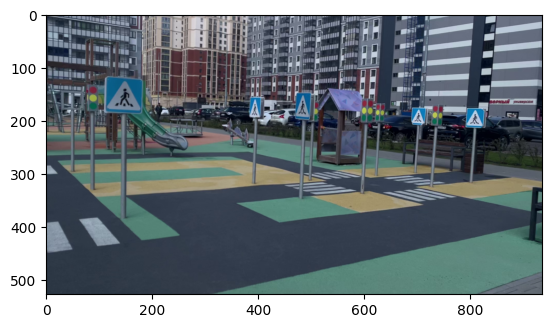

In [64]:
ref_img = cv2.imread('ref.png')
plt.imshow(cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB))

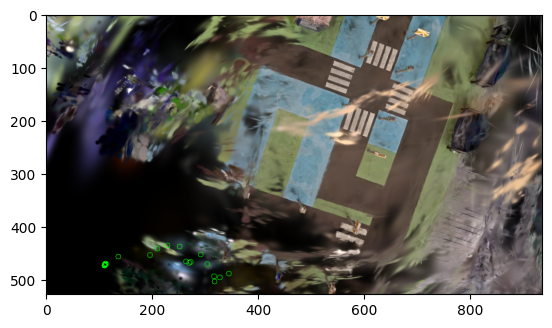

In [65]:
path_img = cv2.imread('camera_path.png')
plt.imshow(cv2.cvtColor(path_img, cv2.COLOR_BGR2RGB))